### Extract Dataset Zip Folder

In [ ]:
import zipfile
import os
with zipfile.ZipFile('./da7ee7_raw.zip', 'r') as zip_ref:
    zip_ref.extractall("./")

In [217]:
with zipfile.ZipFile('./annotations.zip', 'r') as zip_ref:
    zip_ref.extractall("./")

### Analyse Annotations

In [255]:
import os
import json
import re

# Categories to exclude (e.g., "الدحيح" and its variants)
categories_to_merge = {
    "الدحيح",
    "eldahih",
    "elda7ee7",
    "da7ee7",
    "al daheeh",
    "eldaheeh",
    "new media academy",
    "دحيح",
    "daheeh",
    "#daheeh #الدحيح",
    "برنامج الدحيح",
    "new media academy الدحيح",
    "برنامج الدحيح الجديد",
    "elda7i7",
    "حلقة الدحيح",
    "اكاديمية الاعلام الجديد"

}

def clean_categories(categories):
    cleaned = set()
    for cat in categories:
        if cat in categories_to_merge:
            continue
        cleaned.add(cat.strip())
    return cleaned

def process_annotations(folder):
    result = {}
    for filename in os.listdir(folder):
        if filename.endswith("_annotation.json"):
            filepath = os.path.join(folder, filename)

            with open(filepath, "r", encoding="utf-8") as file:
                data = json.load(file)

                # Normalize and clean categories
                categories = set(data.get("Categories", []))
                normalized_categories = clean_categories(categories)

                # Build the dictionary entry
                base_filename = filename.replace("_annotation.json", ".txt")
                result[base_filename] = {
                    "categories": list(normalized_categories),
                    "likes": data.get("Number_of_Likes", 0),
                    "views": data.get("Number_of_Views", 0),
                    "dislikes": data.get("Number_of_Dislikes", 0),
                }
    return result

annotations_dict = process_annotations("Annotations")


In [256]:
annotations_dict

{'Chat GPT  الدحيح.txt': {'categories': ['what is chatgpt',
   'openai',
   'استخدام الآلات',
   'chatgpt explained',
   'open ai chat gpt',
   'large language model',
   'how to use chatgpt',
   'artificial intelligence',
   'الذكاء الاصطناعي',
   'what is chat gpt',
   'open ai',
   'القدرات الحسابية',
   'chat gpt tutorial',
   'chatgpt',
   'chat gpt how to use',
   'how to use chat gpt',
   'chatgpt tutorial',
   'chat gpt',
   'ثورة تكنولوجية',
   'chat gpt explained'],
  'likes': 158194,
  'views': 4196934,
  'dislikes': 0},
 'Oppenheimer  الدحيح.txt': {'categories': ['مشروع مانهاتن النووي',
   'كيف صنعت القنبلة النووية',
   'النووية',
   'manhattan project',
   'قصة القنبلة النووية',
   'nuclear bomb',
   'world war 2',
   'الاتحاد السوفييتي',
   'مشروع منهاتن',
   'الاسلحة النووية',
   'الاتحاد السوفياتي',
   'الاتحاد السوفيتي',
   'معلومات عن الطاقة النووية',
   'atomic bomb',
   'مشروع مانهاتن',
   'world war ii',
   'atom bomb',
   'القنبلة النووية',
   'nuclear weapons',
 

In [269]:
import json
import pandas as pd


def get_most_liked_disliked(data):
    documents_summary = []

    for doc_name, details in data.items():
        documents_summary.append({
            "Document Name": doc_name,
             "Views":details.get("views", 0),
            "Categories": details.get("categories", []),
            "Likes": details.get("likes", 0),
            "Dislikes": details.get("dislikes", 0)
        })

    df = pd.DataFrame(documents_summary)
    most_liked = df.loc[df["Likes"].idxmax()]
    most_disliked = df.loc[df["Dislikes"].idxmax()]

    return most_liked, most_disliked

def display_results(most_liked, most_disliked):
    print("Most Liked Document:")
    print(f"  Document Name: {most_liked['Document Name']}")
    print(f"  Views: {most_liked['Views']}")
    print(f"  Likes: {most_liked['Likes']}")
    print(f"  Categories: {', '.join(most_liked['Categories'])}\n")

    print("Most Liked Document:")
    print(f"  Document Name: {most_disliked['Document Name']}")
    print(f"  Views: {most_disliked['Views']}")
    print(f"  Dislikes: {most_disliked['Dislikes']}")
    print(f"  Categories: {', '.join(most_disliked['Categories'])}\n")



most_liked_doc, most_disliked_doc = get_most_liked_disliked(annotations_dict)
display_results(most_liked_doc, most_disliked_doc)


Most Liked Document:
  Document Name: فلسطين .. حكاية الأرض  الدحيح  Palestine .. a Tale of Land.txt
  Views: 22313352
  Likes: 1148989
  Categories: رام الله, القضية الفلسطينية, مجزرة رفح, Gaza, ياسر عرفات, عكا, فلسطين, حكاية الأرض, الاحتلال, ابو عبيدة, جوالدا مائير, مجزرة الخيام, رفح الفلسطينية, دير ياسين, موشي ديان, طوفان الاقصى, الدحيح فلسطين, رفح, حرب فلسطين, القدس, المقاومة, غزة, حيفا, حماس, اسحق رابين, نتينياهو, هرتزل, Palestine, شيمون بيريز, يافا, شارون, رفح المصرية, حرب المقاومة, بن جوريون, طنطورة, شهيد رفح

Most Liked Document:
  Document Name: Chat GPT  الدحيح.txt
  Views: 4196934
  Dislikes: 0
  Categories: what is chatgpt, openai, استخدام الآلات, chatgpt explained, open ai chat gpt, large language model, how to use chatgpt, artificial intelligence, الذكاء الاصطناعي, what is chat gpt, open ai, القدرات الحسابية, chat gpt tutorial, chatgpt, chat gpt how to use, how to use chat gpt, chatgpt tutorial, chat gpt, ثورة تكنولوجية, chat gpt explained



In [ ]:
import pandas as pd
import arabic_reshaper
from bidi.algorithm import get_display  # For proper display of reshaped Arabic text
import matplotlib.pyplot as plt

# Convert annotations_dict to a DataFrame
def annotations_to_dataframe(annotations_dict):
    data = []
    for doc, details in annotations_dict.items():
        categories = details.get("categories", [])
        data.append({
            "Document": doc,
            "Categories": categories
        })
    return pd.DataFrame(data)

# Count unique occurrences of each category across all documents
def calculate_category_counts(df):
    global_category_counts = {}
    seen_categories = set()

    for _, row in df.iterrows():
        document_categories = row["Categories"]
        for category in document_categories:
            # Skip this category if it's already counted for this document
            if category in seen_categories:
                continue

            # Check if this category contains any word from already taken categories
            category_words = set(category.split())
            skip_category = False
            for seen_category in seen_categories:
                seen_words = set(seen_category.split())
                if category_words & seen_words:  
                    skip_category = True
                    break
            
            if skip_category:
                continue

            # Count the category globally if it appears in any document other than the current one
            global_count = sum(1 for _, doc_row in df.iterrows() if category in doc_row["Categories"])
            if global_count > 1:
                global_category_counts[category] = global_count
            seen_categories.add(category)

    return global_category_counts

def display_top_categories(category_counts, top_n=20):
    sorted_categories = sorted(category_counts.items(), key=lambda x: x[1], reverse=True)[:top_n]
    
    print(f"{'Count':>10} {'Category':<50}") 
    print("=" * 60)
    for category, count in sorted_categories:
        print(f"{count:>10} {category:<50}")  
    
    return sorted_categories

def plot_top_categories(top_categories):
    categories, counts = zip(*top_categories)

    reshaped_categories = [
        get_display(arabic_reshaper.reshape(category)) if any("\u0600" <= char <= "\u06FF" for char in category) else category
        for category in categories
    ]
    
    plt.figure(figsize=(12, 6))
    plt.bar(reshaped_categories, counts, color='skyblue')
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.ylabel("Count", fontsize=14)
    plt.title("Top 20 Categories by Count", fontsize=16)
    plt.tight_layout()
    plt.show()

df_annotations = annotations_to_dataframe(annotations_dict)

if not df_annotations.empty:
    category_counts = calculate_category_counts(df_annotations)
    top_categories = display_top_categories(category_counts, top_n=20)
    plot_top_categories(top_categories)
else:
    print("No data to process.")


### Tokenizing Methods

In [207]:
from nltk.tokenize import RegexpTokenizer
import nltk
import re
nltk.download('punkt')

def tokenize_by_split(text):
    split_on = r'[,\!\.\،\:\[\]\(\)\s\'\"؟]'
    tokenized_document=re.split(split_on,text)
    tokenized_document=[token for token in tokenized_document if token!=""]
    return tokenized_document


def tokenizer(text):
    pattern = r'\b\w+\b|[^\w\s]'
    word_tokenizer = RegexpTokenizer(pattern)
    tokens = word_tokenizer.tokenize(text)
    return tokens

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mariam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [208]:
# List to store document lengths


def tokenize_all_documents(folder):
    doc_lengths = []
    all_documents= dict()
    directory = os.path.join(os.getcwd(), folder)
    for name in os.listdir(directory):
        filepath = os.path.join(directory, name)
        try:
            with open(filepath, 'r', encoding='utf-8') as f:
                # print(f"Content of '{name}'")
                all_documents[name]=tokenize_by_split(f.read())
                doc_lengths.append(len(all_documents[name]))
                # print(all_documents[name])
        except (PermissionError, IsADirectoryError, UnicodeDecodeError) as e:
            print(f"Skipping '{name}' due to error: {e}")
        print()
    return all_documents,doc_lengths


In [209]:
# dictionary with document name as key and array of tokens as value

all_documents_tokenized, doc_lengths= tokenize_all_documents("Raw Data") 

import matplotlib.pyplot as plt

def plot_distribution(doc_lengths):
    plt.figure(figsize=(10,5))
    plt.hist(doc_lengths, bins=30, color="skyblue", edgecolor="black")
    plt.xlabel("Number of Words")
    plt.ylabel("Number of Documents")
    plt.title("Distribution of Document Lengths")
    plt.show()


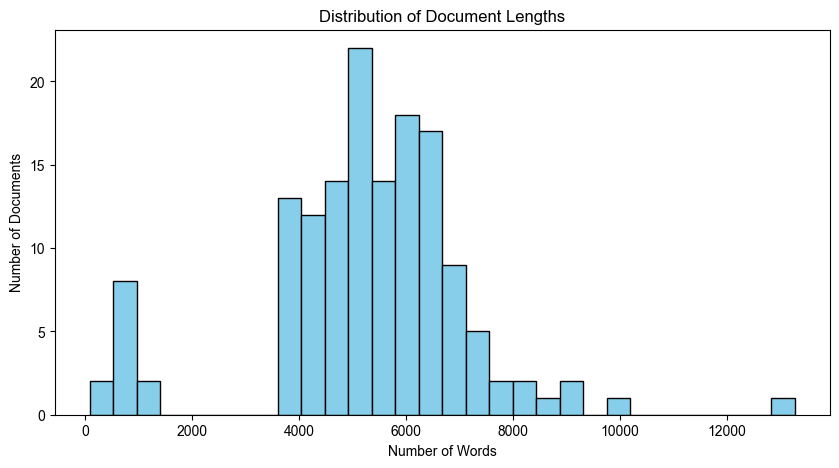

In [210]:
plot_distribution(doc_lengths)

In [211]:
import string
import re

## use this method to ensure additional punctuations is removed & diacritics (tashkeel)
def remove_punctuations_and_numbers(all_documents):
    arabic_punctuation = '،؛؟«»ـ'
    additional_punctuation = '[]\\'
    all_punctuation = string.punctuation + arabic_punctuation + additional_punctuation
    arabic_diacritics = re.compile(r'[\u064B-\u065F\u0610-\u061A\u06D6-\u06ED]')
    
    for document in all_documents:
        filtered = []
        for entry in all_documents[document]:
            entry_no_diacritics = re.sub(arabic_diacritics, '', entry)
            if (entry_no_diacritics and all(char not in all_punctuation for char in entry_no_diacritics) and not any(char.isdigit() for char in entry_no_diacritics)
):
                filtered.append(entry_no_diacritics)
        all_documents[document] = filtered  
                
    return all_documents


In [212]:
filtered_all_docs= remove_punctuations_and_numbers(all_documents_tokenized)

In [213]:
filtered_all_docs

{'Chat GPT  الدحيح.txt': ['موسيقى',
  'موسيقى',
  'عمي',
  'بسيوني',
  'الايام',
  'يا',
  'راجل',
  'طيب',
  'دلوقتي',
  'افتكرت',
  'عم',
  'بسيوني',
  'سامحني',
  'يا',
  'عم',
  'بسيوني',
  'بعدين',
  'بعد',
  'ما',
  'استبدلتوني',
  'بالذكاء',
  'الاصطناعي',
  'وعشان',
  'ايه',
  'عشان',
  'ايه',
  'كل',
  'ده',
  'عشان',
  'اذكى',
  'تمام',
  'وما',
  'بيشربش',
  'سجاير',
  'في',
  'المكتب',
  'بس',
  'اديك',
  'محتاج',
  'ولايس',
  'وسط',
  'الناس',
  'الخبره',
  'عمرها',
  'ما',
  'تيجي',
  'من',
  'المكنه',
  'او',
  'كمبيوتر',
  'الخبره',
  'الحقيقيه',
  'بتيجي',
  'من',
  'الانسان',
  'اللي',
  'صانع',
  'الكمبيوتر',
  'ما',
  'فيش',
  'احسن',
  'من',
  'الذكاء',
  'الطبيعي',
  'ولا',
  'الرضاع',
  'الطبيعي',
  'ولا',
  'عسل',
  'جبل',
  'النحل',
  'الطبيعي',
  'الاصلي',
  'الجميل',
  'ارجوك',
  'يا',
  'عم',
  'بسيوني',
  'يا',
  'راجل',
  'يا',
  'طيب',
  'شوف',
  'لنا',
  'حل',
  'وشغل',
  'لنا',
  'المكنه',
  'بسم',
  'الله',
  'الرحمن',
  'الرحيم',
  'خد',
  'بالك',
  '

### Sentiment Analysis

In [214]:
stopwords_to_remove= ["يا", "دلوقتي", "بعد", "ما", "ايه", "عشان", "كل", "ده", "وما", "في", "بس", "الناس", "من", "او", "اللي", "فيش", "ولا", "الله", "انت", "على", "لو", "مش", "انا", "حد", "مع", "هذه", "هو", "عليه", "ان", "مثلا", "دول", "كانوا", "ممكن", "عزيزي", "دي", "ازاي", "غير", "طبعا", "بعض", "كمان", "ولكن", "كده", "زي", "قبل", "حصل", "لكن", "كانش", "فيه", "لحد", "يبقى", "فيها", "لازم", "يكون", "عن", "وفي", "له", "طب", "احنا", "واحد", "خلاص", "عليها", "منه", "بين", "وهو", "عنده", "يعني", "بقى", "لما", "حتى", "هذا", "حسب", "نفس", "هنا", "هي", "كان", "بتقول", "نفسه", "كانت", "بشكل", "واللي", "هناك", "بتاع", "عايز", "ليه", "عارف", "يوم", "برضه", "دا", "إن", "أوي", "أنا", "أقولك", "أي", "إيه", "حاجة", "كدا", "و", "أو", "مين", "إنه", "ألف", "أول", "لأن", "إنها", "هما", "ودا", "لسة", "شوية"]

def remove_stopwords(all_docs,stopwords):
    for document in all_docs:
        filtered = [entry for entry in all_docs[document] if entry not in stopwords]
        all_docs[document] = filtered
    return all_docs

cleaned_for_analysis= remove_stopwords(filtered_all_docs,stopwords_to_remove)

In [215]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

print("Loading tokenizer and model...")
tokenizer = AutoTokenizer.from_pretrained('Ammar-alhaj-ali/arabic-MARBERT-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('Ammar-alhaj-ali/arabic-MARBERT-sentiment')
print("Tokenizer and model loaded successfully.\n")

def analyze_sentiments(documents, words_per_chunk=150):
    results = {}
    for doc_name, words in documents.items():
        print(f"Processing document: {doc_name}...")
        chunks = [' '.join(words[i:i + words_per_chunk]) for i in range(0, len(words), words_per_chunk)]
        chunk_results = []
        for idx, chunk in enumerate(chunks):
           
            inputs = tokenizer(chunk, return_tensors='pt', truncation=True, padding='max_length', max_length=512)
            outputs = model(**inputs)
            logits = outputs.logits
            probabilities = logits.softmax(dim=-1).squeeze().tolist()  
            predicted_class = logits.argmax(dim=-1).item()
            chunk_results.append((probabilities, predicted_class))

        sentiments = [result[1] for result in chunk_results]
        avg_probabilities = [sum(chunk[0][i] for chunk in chunk_results) / len(chunk_results) for i in range(3)]
        final_sentiment = max(set(sentiments), key=sentiments.count)
        labels = ['negative', 'neutral', 'positive']  
        print(f"Aggregated Sentiment: {labels[final_sentiment]} \n")

      
        results[doc_name] = {
            'text': ' '.join(words[:150]) + '...',
            'sentiment': labels[final_sentiment],
            'probabilities': avg_probabilities
        }

    return results
results = analyze_sentiments(cleaned_for_analysis)
print("\nFinal Sentiment Analysis Results:")
for doc_name, analysis in results.items():
    print(f"Document: {doc_name}")
    print(f"Text: {analysis['text']}")
    print(f"Sentiment: {analysis['sentiment']}")
    print(f"Probabilities: {analysis['probabilities']}\n")


Loading tokenizer and model...
Tokenizer and model loaded successfully.

Processing document: Chat GPT  الدحيح.txt...
Aggregated Sentiment: negative 

Processing document: Oppenheimer  الدحيح.txt...
Aggregated Sentiment: negative 

Processing document: آخر يوم في العالم  الدحيح.txt...
Aggregated Sentiment: negative 

Processing document: أحلى برجر في العالم  الدحيح.txt...
Aggregated Sentiment: negative 

Processing document: أحمد عدوية  الدحيح.txt...
Aggregated Sentiment: negative 

Processing document: أخطر رجل مافيا  الدحيح.txt...
Aggregated Sentiment: negative 

Processing document: أخطر من النووي  الدحيح.txt...
Aggregated Sentiment: negative 

Processing document: أشهر ملاهي في كوكب الارض  الدحيح.txt...
Aggregated Sentiment: negative 

Processing document: أعداد لا وجود لها  الدحيح.txt...
Aggregated Sentiment: negative 

Processing document: أغرب قصة صعود في التاريخ  الدحيح.txt...
Aggregated Sentiment: negative 

Processing document: ألف ليلة وليلة  الدحيح.txt...


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
from nltk.util import ngrams
from collections import Counter
import arabic_reshaper
from bidi.algorithm import get_display

def plot_bigram(all_docs):
    all_bigrams = [bigram for doc in all_docs.values() if len(doc) > 1 for bigram in ngrams(doc, 2)]

# Count the most common bigrams
    bigram_freq = Counter(all_bigrams).most_common(30)  # Show top 20 bigrams

# Prepare data for visualization
    bigrams, counts = zip(*bigram_freq)  # Unpacking bigram and count

# Properly reshape and align Arabic text
    bigram_labels = [get_display(arabic_reshaper.reshape(" ".join(bigram))) for bigram in bigrams]

# Set Arabic font (make sure it's installed on your system)
    plt.rcParams['font.family'] = 'Arial'  # You can replace 'Arial' with any Arabic-supporting font

# Plot the top bigrams
    plt.figure(figsize=(12, 6))
    plt.barh(bigram_labels[::-1], counts[::-1])  # Reverse for correct order
    plt.xlabel("Frequency", fontsize=14)
    plt.title("Top 30 Bigrams", fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()

# Show the plot
    plt.show()


In [ ]:
plot_bigram(filtered_all_docs)

### Calculating TDF 

In [ ]:
def word_count_per_document(all_docs):
    for document in all_docs:
        tokens= all_docs[document]
        word_count= dict()
        for token in tokens:
            if( not token in word_count):
                word_count[token]=1
            else:
                word_count[token]+=1
        all_docs[document]=word_count
    return all_docs                

In [ ]:
word_count_in_doc= word_count_per_document(filtered_all_docs)

In [ ]:
word_count_in_doc

### Choosing words appearing across all documents with highest counts

In [ ]:
def count_word_across_docs(unique_word_count):
    all_words=dict()
    for doc in unique_word_count:
        tokens= unique_word_count[doc]
        for token in tokens:
            if (not token in all_words):
                all_words[token]=tokens[token]
            else: 
                all_words[token]+=tokens[token]    
    return all_words            

def choose_frequent_words_350(count_all_words):
    stopwords=[]
    for token in count_all_words:
        if(count_all_words[token]>=350):
            stopwords.append(token)
    return stopwords    

def choose_frequent_words_550(count_all_words):
    stopwords=[]
    for token in count_all_words:
        if(count_all_words[token]>=550):
            stopwords.append(token)
    return stopwords 

### Checking Word Frequency Across All Documents (not cleaned)

In [ ]:
## not cleaned (every word kept same as in dataset)
word_count_in_all_doc=count_word_across_docs(word_count_in_doc)
stopwords_not_cleaned= choose_frequent_words_350(word_count_in_all_doc)

In [ ]:
stopwords_not_cleaned

In [ ]:
# save to use later in preprocessing
with open('stopwords.txt', 'w', encoding='utf-8') as f:
    for word in stopwords_not_cleaned:
        f.write(word + '\n')

In [ ]:
greater_than_550=choose_frequent_words_550(word_count_in_all_doc)

In [ ]:
greater_than_550

In [ ]:
# compare words not >=150 but >=100 to see if relevant to remove

def find_extra_words(most_frequent_350, most_frequent_550):
    return set(most_frequent_350) - set(most_frequent_550)   

In [ ]:
extra_possible_stopwords= find_extra_words(stopwords_not_cleaned, greater_than_550)

In [ ]:
extra_possible_stopwords

### Checking word frequency after cleaning a bit (combining words)

In [ ]:
## Trying to see count difference (same word in multiple forms)
def simplified_form(token):
    found = True
    base_word = ""
    if token.startswith("و"):  
        base_word = token[1:] 
    elif token.startswith("ب") and len(token) > 3:  
        base_word = token[1:]  
    elif token.startswith("ك") and len(token) > 3:  
        base_word = token[1:]  
    elif token.startswith("ف") and len(token) > 3:  
        base_word = token[1:]  
    elif token.startswith("ل") and len(token) > 3:  
        base_word = token[1:]      
    else:
        found = False               
    return base_word, found


In [ ]:
def token_base_word(token):
    found=True
    base_word=""
    if token.startswith('وال'):  
        base_word = token[3:]   
    elif token.startswith('و') and len(token) > 1:  # Check if the word starts with 'و' and is not just 'و'
        base_word = token[1:] 
    elif token.startswith("ال") and token!="اللى": 
        base_word = token[2:] 
    elif token.startswith("بال") and len(token) > 3:  
        base_word = token[3:]  
    elif token.startswith('ب') and len(token) > 3:  # cases like بشر
        base_word = token[1:]     
    elif token.startswith("كال") and len(token) > 3:  
        base_word = token[3:] 
    elif token.startswith("ك") and len(token) > 2:  # cases like كل
        base_word = token[1:] 
    elif token.startswith("لل") and len(token) > 2:  
        base_word = token[2:]      
    elif token.startswith("ل") and len(token) > 1:  
        base_word = token[1:]     
    else:
        found=False        
    return base_word,found     

In [ ]:
#check across all documents الكلمة + with و\ك\ب\ال\ل

def remove_duplicates_with_prefixes(word_count_per_doc):
    all_words = set()  
    removed_words_with_prefixes = []
    for document in word_count_per_doc:
        all_words.update(word_count_per_doc[document].keys())    
    for document in word_count_per_doc:
        tokens = word_count_per_doc[document]
        keys_to_process = list(tokens.keys())  
        for token in keys_to_process:
            base_word,found= token_base_word(token)
            second_base, second_match=simplified_form(token) #finding with ال if no presence of one without
            if base_word in all_words and found:
                if base_word not in tokens:
                    tokens[base_word]=0
                tokens[base_word] += tokens[token]
                removed_words_with_prefixes.append(token)
                del tokens[token]  
            elif second_base in all_words and second_match:
                if second_base not in tokens:
                    tokens[second_base]=0
                removed_words_with_prefixes.append(token)
                tokens[second_base]+=tokens[token]  
                del tokens[token]  
    return word_count_per_doc,removed_words_with_prefixes

    

In [ ]:
# applied on every words in each document separately
# count_words_in_doc was a dictionary with key document name, value a dictionary of word in document 
# word in document is (key) and it's count as a value

unique_word_count,removed_words_with_prefixes= remove_duplicates_with_prefixes(word_count_in_doc)

In [ ]:
# Now we count similar words with prefixes removed across all documents again
cleaned_count_per_doc= count_word_across_docs(unique_word_count)

In [ ]:
# These are stopwards after prefixes were removed and count across doc recalculated
stopwords_after_cleaning= choose_frequent_words_350(cleaned_count_per_doc)

In [ ]:
stopwords_after_cleaning

In [ ]:
# 17 extra words after merging prefixes 
len(stopwords_after_cleaning)- len(stopwords_not_cleaned)

In [ ]:
greater_than_550_cleaned= choose_frequent_words_550(cleaned_count_per_doc)

In [ ]:
extra_stopwards_cleaned=find_extra_words(stopwords_after_cleaning,greater_than_550_cleaned)

In [ ]:
extra_stopwards_cleaned

### In how many documents was the same word considered frequent?

Finding min values in IDF (most freq)

In [ ]:
import math

def calculate_idf(term_document_count):
    idf_values = dict()  # Dictionary to store the number of documents the word was present in
    documents_count = len(term_document_count)
    for doc in term_document_count:
        tokens = term_document_count[doc]
        for token in tokens:
            if token not in idf_values:
                idf_values[token] = 1
            else:
                idf_values[token] += 1  
    for key in idf_values:
        idf_values[key] = math.log10(documents_count / idf_values[key])     
    sorted_idf = dict(sorted(idf_values.items(), key=lambda item: item[1]))
    return sorted_idf


In [ ]:
def find_top_100(idf_for_word):
    top_100_freq=[]
    counter=0
    for entry in idf_for_word :
        top_100_freq.append(entry)
        counter=counter+1
        if(counter==100):
            break
    return top_100_freq

def find_top_150(idf_for_word):
    top_150_freq=[]
    counter=0
    for entry in idf_for_word:
        top_150_freq.append(entry)
        counter=counter+1
        if(counter==150):
            break
    return top_150_freq
 

In [ ]:
idf=calculate_idf(word_count_in_doc)
idf_cleaned=calculate_idf(unique_word_count)

In [ ]:
def compute_tf_idf(idf_values, documents):
    scores = dict()
    for doc in documents:
        scores[doc] = dict()
        for token in documents[doc]:  
            tf = documents[doc][token] 
            idf = idf_values[token]
            scores[doc][token] = tf * idf  
    return scores


In [ ]:
tf_idf_values=compute_tf_idf(idf,word_count_in_doc)

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from bidi.algorithm import get_display
import arabic_reshaper

def get_top_words(tf_idf_scores, top_n=7):
    top_scores = {}
    for doc, scores in tf_idf_scores.items():
        sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)
        top_scores[doc] = dict(sorted_scores[:top_n])
    return top_scores

def reshape_arabic_text(text):
    return get_display(arabic_reshaper.reshape(text))

def reshape_arabic_words(words):
    reshaped_words = [get_display(arabic_reshaper.reshape(word)) for word in words]
    return reshaped_words

def create_combined_heatmap(top_scores, max_docs=7):
    reshaped_docs = []
    reshaped_words = set()

    selected_docs = list(top_scores.keys())[:max_docs]
    data_dict = {}
    for doc in selected_docs:
        reshaped_doc = reshape_arabic_text(doc)
        reshaped_docs.append(reshaped_doc)

        for word, score in top_scores[doc].items():
            reshaped_word = get_display(arabic_reshaper.reshape(word))
            reshaped_words.add(reshaped_word)

            if reshaped_word not in data_dict:
                data_dict[reshaped_word] = {}
            data_dict[reshaped_word][reshaped_doc] = score
    data_df = pd.DataFrame.from_dict(data_dict, orient="index", columns=reshaped_docs).fillna(0)

    # Plot heatmap
    plt.figure(figsize=(max_docs * 2, len(data_df) * 0.5))
    sns.heatmap(
        data_df,
        cmap="YlGnBu",
        annot=True,
        fmt=".2f",
        cbar_kws={"label": "TF-IDF Score"}
    )
    plt.title("Combined TF-IDF Heatmap")
    plt.xlabel("Documents")
    plt.ylabel("Words")
    plt.tight_layout()
    plt.show()


In [ ]:
top_scores=get_top_words(tf_idf_values)
create_combined_heatmap(top_scores)

### Top 100 and 150 words that are frequent across documents (not cleaned)

In [ ]:
top_100_frequent_idf=find_top_100(idf)

In [ ]:
top_150_frequent_idf=find_top_150(idf)

### Top 100 and 150 words that are frequent across documents (cleaned)

In [ ]:
top_100_freq_idf_cleaned= find_top_100(idf_cleaned)

In [ ]:
top_150_freq_idf_cleaned= find_top_150(idf_cleaned)

### Word Cloud For (all docs)

In [ ]:
from wordcloud import WordCloud
import arabic_reshaper
import matplotlib.pyplot as plt
import os
from bidi.algorithm import get_display

def generate_wordcloud_from_dict(word_counts):
    font_directory = os.path.join(os.getcwd(), "font")
    for file in os.listdir(font_directory):
        if file.endswith(".ttf"): 
            font_file = os.path.join(font_directory, file)
            break
    if not font_file:
        raise FileNotFoundError("No .ttf font file found in the specified directory!")
    
    reshaped_word_counts = {
        get_display(arabic_reshaper.reshape(word)): count for word, count in word_counts.items()
    }
    
    wordcloud = WordCloud(
        font_path=font_file,
        width=5000,
        height=4000,
        random_state=1,
        background_color='white',
        colormap='Set2'
    ).generate_from_frequencies(reshaped_word_counts)

    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()


In [ ]:
generate_wordcloud_from_dict(word_count_in_all_doc)

In [ ]:
generate_wordcloud_from_dict(cleaned_count_per_doc)

### Word Cloud for Rare Words in All Documents

In [ ]:
def generate_word_cloud_rare(idf, word_count_in_all_doc):
    reversed_idf = {key: idf[key] for key in reversed(idf)}
    rare=dict()
    counter=0
    for entry in reversed_idf:
        rare[entry]=word_count_in_all_doc[entry]
        counter+=1
        if(counter==100):
            break
    generate_wordcloud_from_dict(rare) 
        


In [ ]:
generate_word_cloud_rare(idf,word_count_in_all_doc)

In [ ]:
generate_word_cloud_rare(idf_cleaned,cleaned_count_per_doc)

### Analysis for after

In [ ]:
tokenize_all_documents_after, doc_lengths_after= tokenize_all_documents("Preprocessed Data")

In [ ]:
plot_distribution(doc_lengths_after)

In [ ]:
plot_bigram(tokenize_all_documents_after)

In [ ]:
word_count_in_doc_after= word_count_per_document(tokenize_all_documents_after)

In [ ]:
all_doc_words_after= count_word_across_docs(word_count_in_doc_after)

In [ ]:
all_doc_words_after

In [ ]:
choose_frequent_words_550(all_doc_words_after)

In [ ]:
idf_after=calculate_idf(word_count_in_doc_after)

In [ ]:
generate_wordcloud_from_dict(all_doc_words_after)

In [ ]:
generate_word_cloud_rare(idf_after,all_doc_words_after)

In [ ]:
tf_idf_values_after= compute_tf_idf(idf_after,word_count_in_doc_after)

In [ ]:
top_scores_after= get_top_words(tf_idf_values_after)

In [ ]:
create_combined_heatmap(top_scores_after)